<a href="https://colab.research.google.com/github/surbhi28/hamoye_projects/blob/main/Stage_D_Final_food_consumption_and_production_analysis_of_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

dataset_food_prod = pd.read_csv("/content/Africa Food Production (2004 - 2013).csv")
dataset_food_supply = pd.read_csv("/content/Africa Food Supply (2004 - 2013).csv")

In [ ]:
dataset_food_prod.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [ ]:
dataset_food_supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [ ]:
dataset_food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


#CHANGING YEAR COLUMN TO DATETIME TYPE

In [ ]:
dataset_food_prod['Year'] = pd.to_datetime(dataset_food_prod['Year'], format='%Y').dt.year

#ADDING UNIT

In [ ]:
dataset_food_prod['Unit'] = 'kt'

In [ ]:
dataset_food_prod.head()

,Country,Item,Year,Value,Unit
0,Algeria,Wheat and products,2004,2731,kt
1,Algeria,Wheat and products,2005,2415,kt
2,Algeria,Wheat and products,2006,2688,kt
3,Algeria,Wheat and products,2007,2319,kt
4,Algeria,Wheat and products,2008,1111,kt


In [ ]:
groupby_country_year_item = dataset_food_prod.groupby(by=['Country','Year','Item'])
groupby_country_year_item

In [ ]:
groupby_country_year_item.agg(func = {'Value' :'sum'}).loc[:]

Value
Country  Year Item                        
Algeria  2004 Apples and products      165
              Bananas                    0
              Barley and products     1212
              Beans                      2
              Beer                     110
...                                    ...
Zimbabwe 2013 Tea (including mate)      19
              Tomatoes and products     24
              Vegetables, Other        203
              Wheat and products        25
              Wine                       2

[23110 rows x 1 columns]

In [ ]:
groupby_country_year = dataset_food_prod.groupby(by=['Country','Year'],as_index=False)
groupby_country_year

In [ ]:
dataset_1 = groupby_country_year.agg({'Value': 'sum'})
dataset_1

,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
...,...,...,...
445,Zimbabwe,2009,5754
446,Zimbabwe,2010,6777
447,Zimbabwe,2011,7551
448,Zimbabwe,2012,8173


#TREND OF PRODUCTION ACROSS ALL YEARS FOR ALL COUNTIRES

In [ ]:
dataset_1.Year = pd.Categorical(dataset_1.Year, categories=list(dataset_food_prod['Year'].unique()), ordered=True)

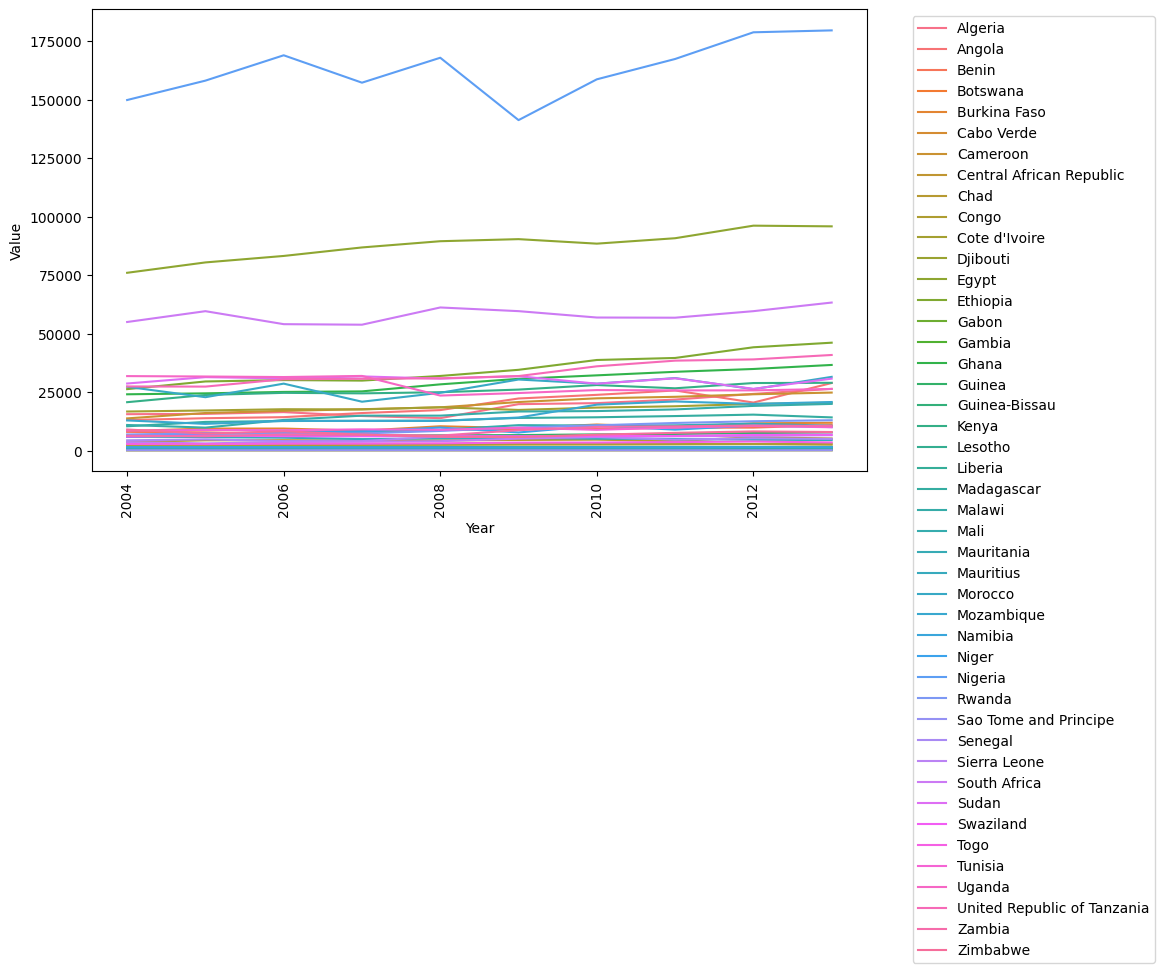

In [ ]:
# importing matplotlib module
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=dataset_1, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [ ]:

import plotly.express as px

fig = px.line(dataset_1, x = "Year", y = "Value",
              color = "Country")
fig.show()

In [ ]:
import numpy as np
dataset_food_prod['ValueNormalize'] = np.log10(dataset_food_prod['Value'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10



In [ ]:
# Create basic choropleth map
fig = px.choropleth(dataset_food_prod,
                    locations='Country',
                    color='ValueNormalize',
                    locationmode = 'country names',
                    scope = 'africa',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    hover_data=['Value'],
                    title='Food Production by Country',
                    animation_frame = 'Year')
fig

#Trend in Food Supply across years for all Countries

In [ ]:
dataset_food_supply['Year'] = pd.to_datetime(dataset_food_supply['Year'], format='%Y').dt.year

In [ ]:
dataset_food_supply['Unit'] = 'kcal/(person day)'

In [ ]:
groupby_supply = dataset_food_supply.groupby(by=['Country','Year'],as_index=False)
groupby_supply

In [ ]:
groupby_supply = dataset_food_supply.groupby(by=['Country','Year'],as_index=False)
groupby_supply

In [ ]:
dataset_2 = groupby_supply.agg({'Value': 'sum'})
dataset_2

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [ ]:
fig_1 = px.line(dataset_2, x = "Year", y = "Value",
              color = "Country")
fig_1.show()

In [ ]:
dataset_food_supply['ValueNormalize'] = np.log10(dataset_food_supply['Value'])

In [ ]:
# Create basic choropleth map
fig = px.choropleth(dataset_food_supply,
                    locations='Country',
                    color='ValueNormalize',
                    locationmode = 'country names',
                    scope = 'africa',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    hover_data=['Value'],
                    title='Food Production by Country',
                    animation_frame = 'Year')
fig

#Box plot of Food Supply in 45 Countries from Year 2004 - 2013

In [ ]:
groupby_year = dataset_food_supply.groupby('Year',as_index=False)
groupby_year


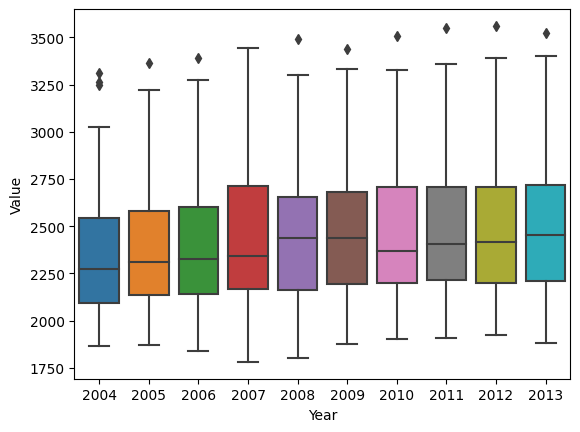

In [ ]:
import seaborn as sns
sns.boxplot(x = dataset_food_supply['Year'],
            y = dataset_food_supply['Value'])

plt.show()

#The Name of the Country which is an Outlier in Year 2012

In [ ]:
group_2012_Value=np.array(groupby_year.get_group(2012)['Value'])

q3 = np.quantile(group_2012_Value ,0.75 , method = 'midpoint')
q1 = np.quantile(group_2012_Value ,0.25 , method = 'midpoint')
iqr = q3 - q1
print(iqr)
upper_fence = q3 +(1.5*iqr)
print(upper_fence)

507.0
3467.5


In [ ]:
df_2012 = groupby_year.get_group(2012)
df_2012[df_2012['Value'] > upper_fence]

,Country,Year,Value,Unit,ValueNormalize
128,Egypt,2012,3561,kcal/(person day),3.551572


#Box plot of Food Production in 45 Countries from Year 2004 - 2013

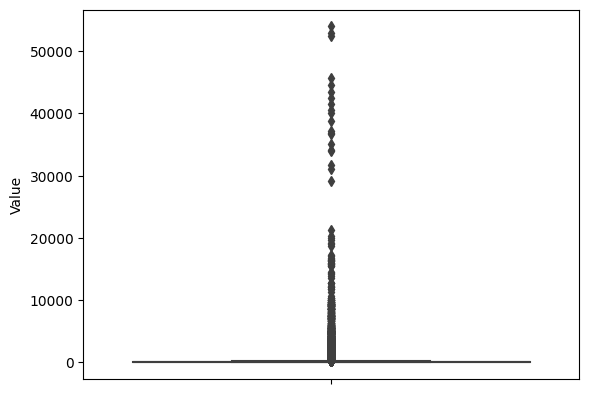

In [ ]:
import seaborn as sns
sns.boxplot(y = dataset_food_prod['Value'])

plt.show()

In [ ]:
median = np.quantile(dataset_food_prod['Value'],0.5,method = 'midpoint')
mean = np.mean(dataset_food_prod['Value'])
print("Median=",median,"\n","Mean=",mean)

Median= 18.0 
 Mean= 327.7852012115967


In [ ]:
q3 = np.quantile(dataset_food_prod['Value'] ,0.75 , method = 'midpoint')
q1 = np.quantile(dataset_food_prod['Value'] ,0.25 , method = 'midpoint')
iqr = q3 - q1
print(iqr)
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
print("Lower_fence=" ,lower_fence ,'\n',"Upper fence=", upper_fence)
# No. of Outliers above upper fence
dataset_food_prod[(dataset_food_prod['Value'] > upper_fence) ]

105.0
Lower_fence= -154.5 
 Upper fence= 265.5


,Country,Item,Year,Value,Unit,ValueNormalize
0,Algeria,Wheat and products,2004,2731,kt,3.436322
1,Algeria,Wheat and products,2005,2415,kt,3.382917
2,Algeria,Wheat and products,2006,2688,kt,3.429429
3,Algeria,Wheat and products,2007,2319,kt,3.365301
4,Algeria,Wheat and products,2008,1111,kt,3.045714
...,...,...,...,...,...,...
23085,Zimbabwe,Milk - Excluding Butter,2009,389,kt,2.589950
23086,Zimbabwe,Milk - Excluding Butter,2010,396,kt,2.597695
23087,Zimbabwe,Milk - Excluding Butter,2011,400,kt,2.602060
23088,Zimbabwe,Milk - Excluding Butter,2012,410,kt,2.612784


In [ ]:
# No of outliers below lower fence
dataset_food_prod[(dataset_food_prod['Value'] < lower_fence) ]

,Country,Item,Year,Value,Unit,ValueNormalize


#Three countries producing the highest total quantity of rice from 2004 to 2013!

In [ ]:
# Removing Missing Values
dataset_food_prod.drop(dataset_food_prod[dataset_food_prod['Value'] == 0].index,axis=0,inplace=True)

In [ ]:
#Checking for Missing Values
dataset_food_prod['Value'].value_counts()

1       1714
2       1091
3        864
4        706
6        552
        ... 
3234       1
2792       1
2381       1
368        1
3880       1
Name: Value, Length: 2133, dtype: int64

In [ ]:
groupby_year_item = dataset_food_prod.groupby(by=['Item'])

dataset_4 = groupby_year_item.get_group('Rice (Milled Equivalent)')
dataset_4

,Country,Item,Year,Value,Unit,ValueNormalize
590,Angola,Rice (Milled Equivalent),2004,9,kt,0.954243
591,Angola,Rice (Milled Equivalent),2005,6,kt,0.778151
592,Angola,Rice (Milled Equivalent),2006,3,kt,0.477121
593,Angola,Rice (Milled Equivalent),2007,3,kt,0.477121
594,Angola,Rice (Milled Equivalent),2008,6,kt,0.778151
...,...,...,...,...,...,...
22006,Zambia,Rice (Milled Equivalent),2010,34,kt,1.531479
22007,Zambia,Rice (Milled Equivalent),2011,33,kt,1.518514
22008,Zambia,Rice (Milled Equivalent),2012,30,kt,1.477121
22009,Zambia,Rice (Milled Equivalent),2013,30,kt,1.477121


In [ ]:
# Create basic choropleth map
import plotly.express as px
fig = px.choropleth(dataset_4,
                    locations='Country',
                    color='Value',
                    locationmode = 'country names',
                    scope = 'africa',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    hover_data=['Value'],
                    title='Food Production by Country',
                    animation_frame = 'Year')
fig

In [ ]:
groupby_year_item = dataset_food_prod.groupby(by=['Item','Country'])

groupby_year_item.agg(func = 'sum').loc[['Rice (Milled Equivalent)'],"Value"].sort_values(ascending=False)


<ipython-input-39-b19fce529ea0>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Item                      Country                    
Rice (Milled Equivalent)  Egypt                          40370
                          Nigeria                        26964
                          Madagascar                     26118
                          United Republic of Tanzania    10956
                          Guinea                         10400
                          Mali                           10371
                          Cote d'Ivoire                   6439
                          Sierra Leone                    6038
                          Senegal                         2462
                          Ghana                           2443
                          Liberia                         1602
                          Burkina Faso                    1265
                          Uganda                          1234
                          Chad                            1167
                          Mozambique                      1110
 

#TOP 10 ITEMS PRODUCED

In [122]:
dataset_food_prod.groupby(by=['Item'],as_index = False)['Value'].sum().sort_values(by = 'Value',ascending = False)[:10]

,Item,Value
12,Cassava and products,1118948
82,Sugar cane,887008
40,Maize and products,574948
93,Yams,511523
90,"Vegetables, Other",410403
43,Milk - Excluding Butter,380380
76,Sorghum and products,241080
91,Wheat and products,229875
9,"Beverages, Fermented",227037
66,Potatoes and products,221092


#TOP 5 ITEMS PRODUCED EVERY YEAR

In [ ]:
dataset_5 = dataset_food_prod.groupby(['Year','Item'],as_index = False).agg('sum').loc[:,('Year','Item','Value')]

In [172]:
dataset_5.sort_values(by='Value',ascending = False).reset_index()

,index,Year,Item,Value
0,856,2013,Cassava and products,136350
1,762,2012,Cassava and products,129747
2,668,2011,Cassava and products,129663
3,574,2010,Cassava and products,116281
4,480,2009,Cassava and products,104989
...,...,...,...,...
933,189,2006,"Aquatic Animals, Others",1
934,752,2012,"Aquatic Animals, Others",1
935,470,2009,"Aquatic Animals, Others",1
936,2,2004,"Aquatic Animals, Others",1


In [173]:
fig_1 = px.line(dataset_5, x = "Year", y = "Value",
              color = "Item")
fig_1.show()

#Comparison between average food consumption and production for each year.

In [ ]:
mean_food_prod = dataset_food_prod.groupby('Year')['Value'].mean().values

In [ ]:
mean_food_supply = dataset_food_supply.groupby('Year')['Value'].mean().values

In [ ]:
year_values = dataset_food_prod['Year'].unique()

In [ ]:
my_list = list(year_values)
value_index= []
for value in my_list:
    value_index.append(my_list.index(value))

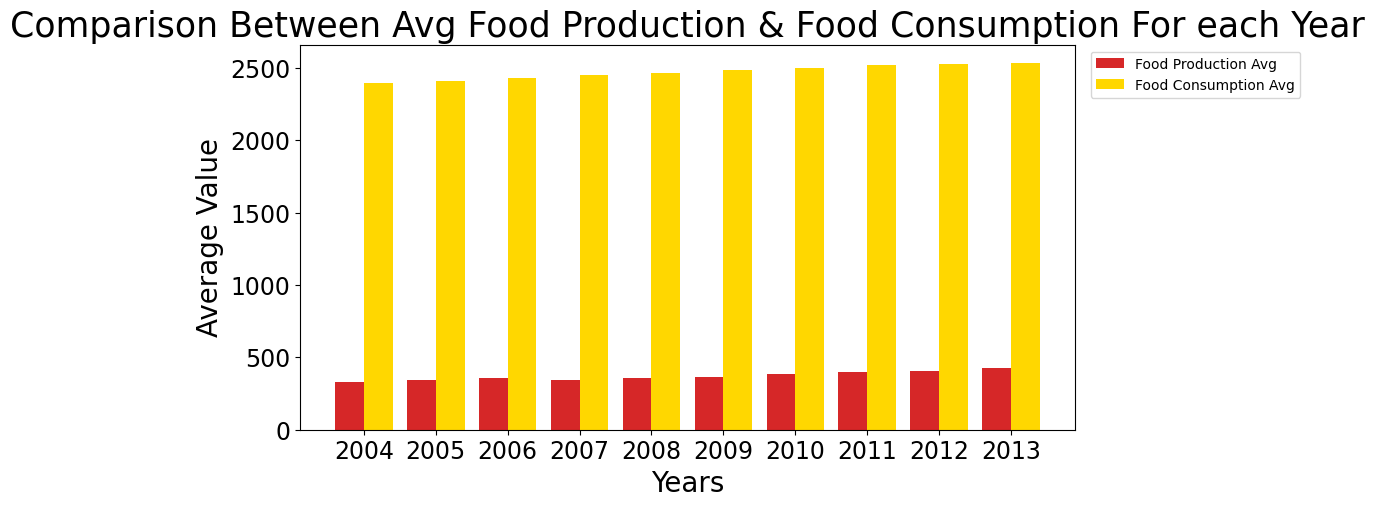

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(year_values))
width = 0.4
plt.bar(x-0.2, mean_food_prod,
        width, color='tab:red', label='Food Production Avg')
plt.bar(x+0.2, mean_food_supply,
        width, color='gold', label='Food Consumption Avg')
plt.title('Comparison Between Avg Food Production & Food Consumption For each Year', fontsize=25)
plt.xlabel('Years',fontsize=20)
plt.xticks(value_index, year_values, fontsize=17)
plt.ylabel('Average Value', fontsize=20)
plt.yticks(fontsize=17)
plt.legend(bbox_to_anchor=(1.3, 1),fontsize=10)
plt.show()

In [104]:
dataset_food_prod.Item.nunique()

94

#Trends in food production and consumption over the years

In [114]:
# # Group together all food and feed items and sum the production values of each year
food_prod = dataset_food_prod.groupby(['Year'])['Value'].sum().reset_index()
food_prod


,Year,Value
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804
5,2009,746870
6,2010,786466
7,2011,812214
8,2012,841667
9,2013,872571


In [108]:
food_supply = dataset_food_supply.groupby(['Year'])['Value'].sum().reset_index()
food_supply


,Year,Value
0,2004,107740
1,2005,108418
2,2006,109386
3,2007,110149
4,2008,110734
5,2009,111700
6,2010,112383
7,2011,113194
8,2012,113744
9,2013,113951


In [111]:
df = pd.DataFrame({'Year' : food_prod['Year'],'Food Production' : food_prod['Value'],'Food Supply' : food_supply['Value']})

In [116]:
line = px.line(df, x='Year', y=['Food Production','Food Supply'], markers=True, title='Trend of Food Production & Food Supply')


line.show()